Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
print("LIBRARIES ARE SUCCESSFULLY LOADED")

LIBRARIES ARE SUCCESSFULLY LOADED


Loading the Data Set

In [ ]:

# 1. Load your Excel file
df = pd.read_excel("Task___students_performance_dataset.xlsx")

# 2. Save as CSV
df.to_csv("students_performance_dataset.csv", index=False)

print("Excel to CSV conversion done!...")


DATASET LOADED SUCCESSFULLY


Analysing the Data Set

In [30]:

print("DATASET INFO:")
print(df.info())

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 

In [31]:
print(f"MISSING VALUES: {df.isnull().sum()}")

MISSING VALUES: Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


Handling Categorical Features

In [32]:
df.drop(['Student_ID'], axis=1, inplace=True)


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  300 non-null    object 
 1   Study_Hours_per_Week    300 non-null    float64
 2   Attendance_Percentage   300 non-null    float64
 3   Previous_Sem_Score      300 non-null    float64
 4   Parental_Education      300 non-null    object 
 5   Internet_Access         300 non-null    object 
 6   Family_Income           300 non-null    float64
 7   Tutoring_Classes        300 non-null    object 
 8   Sports_Activity         300 non-null    object 
 9   Extra_Curricular        300 non-null    object 
 10  School_Type             300 non-null    object 
 11  Sleep_Hours             300 non-null    float64
 12  Travel_Time             300 non-null    float64
 13  Test_Anxiety_Level      300 non-null    float64
 14  Peer_Influence          300 non-null    fl

In [34]:
print(df.head)

<bound method NDFrame.head of      Gender  Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
0      Male             36.330635              86.628815           38.182863   
1    Female              9.582476              73.504255           95.788249   
2      Male              5.795795              65.453321           73.939564   
3      Male             19.578110              94.381263           53.443393   
4      Male             39.426018              46.671849           39.749045   
..      ...                   ...                    ...                 ...   
295  Female             37.889943              93.974474           73.110423   
296  Female             39.440043              63.033473           46.307163   
297    Male             30.135127              72.613172           31.708055   
298    Male             15.050383              94.388327           90.906921   
299  Female              3.340029              77.454280           31.488859   

    Paren

Handling the ordinal column

In [35]:
education_map = {'High School': 1, 'Graduate': 2, 'Postgraduate': 3}
df['Parental_Education'] = df['Parental_Education'].map(education_map)
feedback_map = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
df['Teacher_Feedback'] = df['Teacher_Feedback'].map(feedback_map)
print("ORDINAL COLUMN SUCCESSFULLY ENCODED")

ORDINAL COLUMN SUCCESSFULLY ENCODED


In [36]:
print(df.head)

<bound method NDFrame.head of      Gender  Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
0      Male             36.330635              86.628815           38.182863   
1    Female              9.582476              73.504255           95.788249   
2      Male              5.795795              65.453321           73.939564   
3      Male             19.578110              94.381263           53.443393   
4      Male             39.426018              46.671849           39.749045   
..      ...                   ...                    ...                 ...   
295  Female             37.889943              93.974474           73.110423   
296  Female             39.440043              63.033473           46.307163   
297    Male             30.135127              72.613172           31.708055   
298    Male             15.050383              94.388327           90.906921   
299  Female              3.340029              77.454280           31.488859   

     Pare

Handling the binary column

In [37]:
binary_map = {'Yes': 1, 'No': 0}
df['Internet_Access'] = df['Internet_Access'].map(binary_map)
df['Tutoring_Classes'] = df['Tutoring_Classes'].map(binary_map)
df['Sports_Activity'] = df['Sports_Activity'].map(binary_map)
df['Extra_Curricular'] = df['Extra_Curricular'].map(binary_map)
print("BINARY YES / NO COLUMN SUCCESFULLY ENCODED")

BINARY YES / NO COLUMN SUCCESFULLY ENCODED


One Hot Encoding

In [38]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'School_Type'], drop_first=True)
print("NOMINAL COLUMN SUCCESSFULLY ONE HOT ENCODED")
print("ENCODED DATAHEAD FRAME")
print(df_encoded.head())

NOMINAL COLUMN SUCCESSFULLY ONE HOT ENCODED
ENCODED DATAHEAD FRAME
   Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
0             36.330635              86.628815           38.182863   
1              9.582476              73.504255           95.788249   
2              5.795795              65.453321           73.939564   
3             19.578110              94.381263           53.443393   
4             39.426018              46.671849           39.749045   

   Parental_Education  Internet_Access  Family_Income  Tutoring_Classes  \
0                   3                0   32727.500387                 0   
1                   1                0   42332.567312                 0   
2                   1                1   44142.273093                 0   
3                   2                1   64498.434188                 0   
4                   3                0   42105.884774                 0   

   Sports_Activity  Extra_Curricular  Sleep_Hours  Travel_Tim

In [39]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Study_Hours_per_Week    300 non-null    float64
 1   Attendance_Percentage   300 non-null    float64
 2   Previous_Sem_Score      300 non-null    float64
 3   Parental_Education      300 non-null    int64  
 4   Internet_Access         300 non-null    int64  
 5   Family_Income           300 non-null    float64
 6   Tutoring_Classes        300 non-null    int64  
 7   Sports_Activity         300 non-null    int64  
 8   Extra_Curricular        300 non-null    int64  
 9   Sleep_Hours             300 non-null    float64
 10  Travel_Time             300 non-null    float64
 11  Test_Anxiety_Level      300 non-null    float64
 12  Peer_Influence          300 non-null    float64
 13  Teacher_Feedback        300 non-null    int64  
 14  Motivation_Level        300 non-null    fl

Analyzing the Correlation

In [40]:
correlation_matrix = df_encoded.corr()
print("CORRELATION WITH FINAL SCORE:")
print(correlation_matrix['Final_Score'].sort_values(ascending=False))

CORRELATION WITH FINAL SCORE:
Final_Score               1.000000
Previous_Sem_Score        0.632940
Study_Hours_per_Week      0.464599
Attendance_Percentage     0.335473
Family_Income             0.090093
Extra_Curricular          0.025958
Sleep_Hours               0.021040
Parental_Education        0.002039
School_Type_Public        0.001950
Gender_Male              -0.005002
Internet_Access          -0.013847
Sports_Activity          -0.017446
Teacher_Feedback         -0.019157
Motivation_Level         -0.020367
Peer_Influence           -0.024590
Tutoring_Classes         -0.035658
Travel_Time              -0.037715
Test_Anxiety_Level       -0.042936
Library_Usage_per_Week   -0.111752
Name: Final_Score, dtype: float64


Visualization for Correlation Matrix

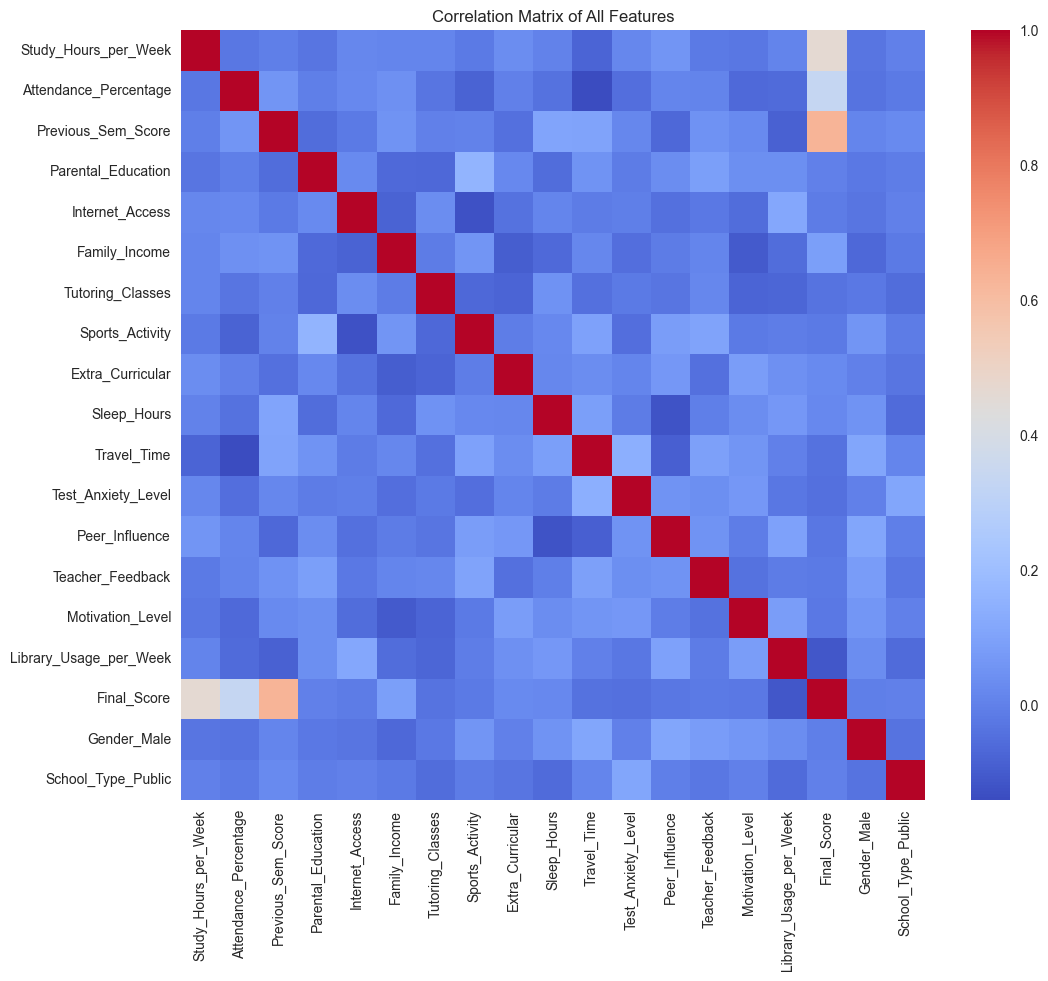

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

Target and Features Selection

In [42]:
X = df_encoded.drop('Final_Score', axis=1)
y = df_encoded['Final_Score']
print("TARGET AND FEATURES SELECTED")

TARGET AND FEATURES SELECTED


In [43]:
df_encoded.describe()

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,1.960000,0.453333,54518.876589,0.486667,0.480000,0.463333,6.993096,1.670011,5.468870,5.763599,2.586667,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,0.833095,0.498649,24845.101039,0.500657,0.500435,0.499487,1.734910,0.840759,2.559495,2.476379,1.125483,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,1.000000,0.000000,10111.301178,0.000000,0.000000,0.000000,4.012623,0.101284,1.018167,1.048115,1.000000,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,1.000000,0.000000,32842.034240,0.000000,0.000000,0.000000,5.450614,0.953231,3.226739,4.106060,2.000000,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,2.000000,0.000000,56120.473769,0.000000,0.000000,0.000000,7.144770,1.735533,5.536846,5.873572,3.000000,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,3.000000,1.000000,74997.618701,1.000000,1.000000,1.000000,8.417073,2.436196,7.683439,7.751822,4.000000,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,3.000000,1.000000,99593.244163,1.000000,1.000000,1.000000,9.998283,2.998452,9.995895,9.902960,4.000000,9.978605,9.000000,67.295712


Feature Scaling

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.3579205 ,  0.97568547, -1.26917912, ..., -0.1589615 ,
         0.99335541, -1.01342342],
       [-0.90411771,  0.22363467,  1.55147506, ..., -0.1589615 ,
        -1.00668904, -1.01342342],
       [-1.2243497 , -0.23769216,  0.48165175, ...,  0.20507247,
         0.99335541, -1.01342342],
       ...,
       [ 0.83397882,  0.17257468, -1.58621883, ...,  1.66120838,
         0.99335541, -1.01342342],
       [-0.44170772,  1.42031348,  1.31246032, ...,  0.56910645,
         0.99335541,  0.98675438],
       [-1.43202893,  0.44997515, -1.59695178, ...,  1.2971744 ,
        -1.00668904, -1.01342342]], shape=(300, 18))

Splitting the Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data Split:
Training set: 240 samples
Test set: 60 samples


Feature Selection

In [46]:
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print(f"Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

Feature Selection: Top 5 features selected
Selected features: ['Study_Hours_per_Week', 'Attendance_Percentage', 'Previous_Sem_Score', 'Sports_Activity', 'Library_Usage_per_Week']


Creating and Training the Model

In [47]:
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("LINEAR REGRESSION MODEL IS CREATED AND TRAINED SUCCESSFULLY")

LINEAR REGRESSION MODEL IS CREATED AND TRAINED SUCCESSFULLY


Prediction Process

In [48]:
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)
print("PREDICTION PROCESS SUCCESSFULLY COMPLETED")


PREDICTION PROCESS SUCCESSFULLY COMPLETED


Performance Metrics

In [49]:
print("TRAINING SET PERFORMANCE")
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"MSE: {mse:.2f}%")

TRAINING SET PERFORMANCE
R² Score: 0.7348
RMSE: $5.14
MAE: $4.10
MSE: 26.37%


In [50]:
print("TESTING SET PERFORMANCE")
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"MSE: {mse:.2f}%")

TESTING SET PERFORMANCE
R² Score: 0.6248
RMSE: $5.93
MAE: $4.75
MSE: 35.22%


Saving my Model Into joblib

In [51]:
import joblib

# Save the model
joblib.dump(model, 'Student_Performance_Data_Analysis_model.pkl')

# Save the scaler
joblib.dump(scaler, 'Student_Performance_Data_Analysis_scaler.pkl')

# Save the feature selector
joblib.dump(selector, 'Student_Performance_Data_Analysis_selector.pkl')

print("✅ Model, scaler, and selector saved successfully!")

✅ Model, scaler, and selector saved successfully!
